# Dev [Part 2]

In [3]:
%pylab inline
import sys
from ipywidgets import interact

sys.path.append('src')
from motorControl import *
from trajectoryPlanning import *

rc = connect(portName = "/dev/tty.usbserial-A9ETDN3N")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Initialized Motor Classes

- Really important to initialze these first to restore positions from last session!

In [4]:
#Initialize motor objects for each motor:
vL = Motor(address = 0x81, motorNumber = 2, rc = rc, signFlipped = False, \
           motorCounter = 0, kPID = [1.0, 1.0])
vR = Motor(address = 0x81, motorNumber = 1, rc = rc, signFlipped = False, \
           motorCounter = 1, kPID = [1.0, 1.0])
LR = Motor(address = 0x80, motorNumber = 1, rc = rc, motorCounter = 2, kPID = [1e-2, 1.0])
FB = Motor(address = 0x80, motorNumber = 2, rc = rc, signFlipped = True, \
           motorCounter = 3, kPID = [1.0, 1.0])
yaw = Motor(address = 0x82, motorNumber = 2, rc = rc, signFlipped = False, \
            motorCounter = 4, kPID = [1.0, 1.0])
pitch = Motor(address = 0x82, motorNumber = 1, rc = rc, signFlipped = False, \
              motorCounter = 5, kPID = [1.0, 1.0])

#Keep in a nice motor list:
motors = [vL, vR, LR, FB, yaw, pitch]

In [5]:
getPositions(motors)

[-11604, -10402, 53468, 2880, -1115, 0]

In [15]:
interact(manualControl, leftUD = (-50, 50), rightUD = (-50, 50), leftRight = (-50, 50), \
         fB = (-50, 50), tilt = (-50, 50), pan = (-50, 50))

In [14]:
stopAll(rc)

In [16]:
getPositions(motors)

[-10725, 5916, 61801, 1808, -1115, 0]

In [8]:
getPositions(motors)

[-11604, 3817, 53468, 2880, -1115, 0]

### Simple Quadratic Controlled Move!

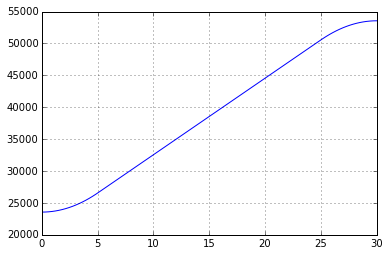

In [19]:
startingPosition = LR.getPosition()
targetPosition = startingPosition + 30000.0 #ticks
totalTime = 30.0 #s
lookAheadTime = 1.0 #s

SQT = SimpleQuadraticTrajectory(tu = 5, tt = totalTime, p1 = startingPosition, p2 = targetPosition)
SQT.visualize()

In [20]:
LR.initialize(targetVelocityMin = -2500.0, targetVelocityMax = 2500.0)
LR.clearTracking()

startTime = time.time()
timeElapsed = 0.0

while timeElapsed < totalTime:
    timeElapsed = time.time()-startTime
    lookAheadValue = SQT.compute(timeElapsed + lookAheadTime)
    LR.controlledMove(targetPosition = lookAheadValue, timeToReach = lookAheadTime)
    time.sleep(0.1)

stopAll(rc)
savePositions(motors)

In [21]:
stopAll(rc)

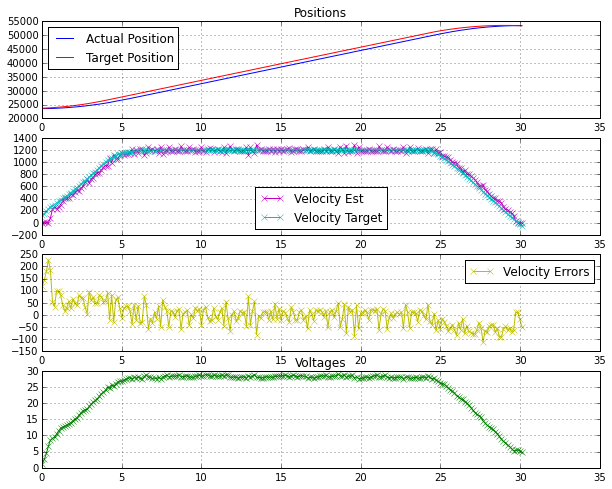

In [22]:
LR.visualizeMove()

## Woohoo!

In [23]:
print targetPosition, LR.getPosition()

53560.0 53468
